In [1]:
import pandas as pd
dfo=pd.read_csv('parkinsons.data')
cols = list(dfo)
cols.insert(24, cols.pop(cols.index('status')))
dfo = dfo.loc[:, cols]

# Xgboost regressor

In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
X,y = dfo.iloc[:,1:-1],dfo.iloc[:,-1]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [4]:
xg_reg = xgb.XGBRegressor(objective ='binary:hinge', colsample_bytree = 0.3, learning_rate = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 10) #learning_rate = 0.1

In [5]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [6]:
X_test.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
56,110.417,131.067,103.370,0.00784,0.00007,0.00352,0.00514,0.01056,0.03715,0.334,...,0.02802,0.06097,0.00969,21.422,0.541781,0.821364,-4.438453,0.238298,1.922940,0.335041
141,208.083,253.792,91.802,0.00757,0.00004,0.00428,0.00428,0.01285,0.06725,0.571,...,0.04464,0.12047,0.04238,15.648,0.606344,0.665945,-5.410336,0.288917,2.665133,0.231723
170,244.990,272.210,239.170,0.00451,0.00002,0.00279,0.00237,0.00837,0.01897,0.181,...,0.01255,0.03253,0.01049,21.528,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220
65,228.969,239.541,113.201,0.00238,0.00001,0.00136,0.00140,0.00408,0.01745,0.154,...,0.01234,0.02827,0.00420,24.547,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
66,140.341,159.774,67.021,0.00817,0.00006,0.00430,0.00440,0.01289,0.03198,0.313,...,0.02428,0.05490,0.02183,19.560,0.460139,0.720908,-5.409423,0.226850,2.359973,0.226156


In [7]:
print(preds)

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


In [8]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

from sklearn.metrics import accuracy_score
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, preds)*100))

RMSE: 0.277350
XGBoost model accuracy score: 92.3077


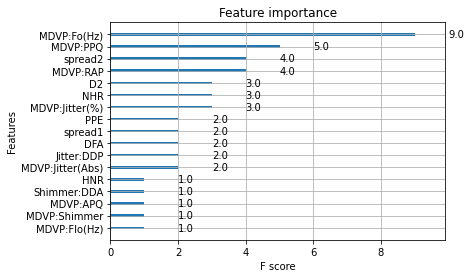

In [9]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [14, 5]
plt.show()